In [107]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import osmnx as ox

from matplotlib import rc, animation
rc('animation', html='html5')
rc('figure', figsize=(20,20))

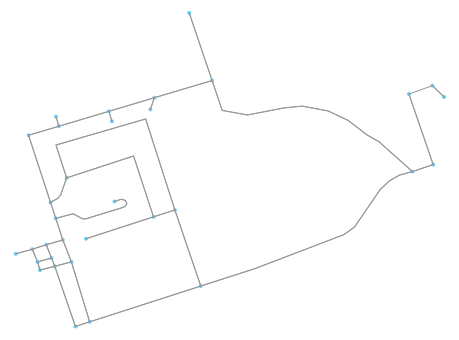

(<matplotlib.figure.Figure at 0x7ff831b650f0>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7ff83164ea20>)

In [115]:
G = ox.graph_from_address('27 King\'s College Cir, Toronto, ON M5S 1A1, Canada', distance=100)
ox.plot_graph(ox.project_graph(G))

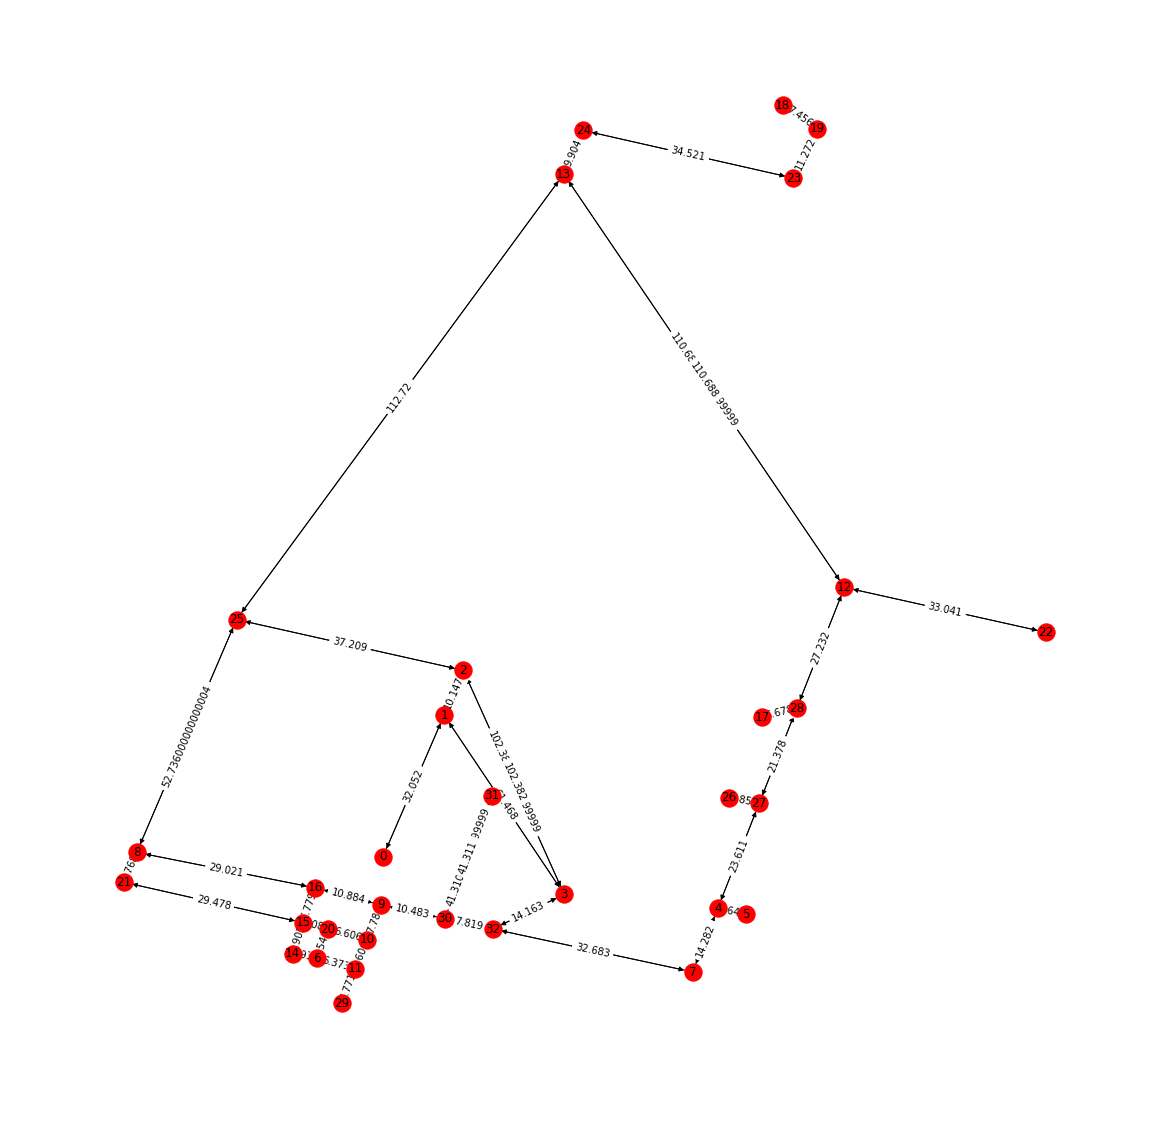

In [138]:
def scale(vals, lower, upper):
    vals = np.array(vals)
    vals = (vals - vals.min()) / (vals.max() - vals.min())
    return vals * (upper-lower) + lower


g = nx.convert_node_labels_to_integers(G)
pos = {}
ns, xs, ys = [], [], []

for n, d in g.nodes(data=True):
    y, x = d['y'], d['x']
    ns.append(n)
    xs.append(y)
    ys.append(x)

lower, upper = 0, 10
xs = scale(xs, lower,upper)
ys = scale(ys, lower, upper)
pos = {n:[x,y] for n,x,y in zip(ns, xs, ys)}
edge_labels = {(n[0], n[1]):l for n, l in nx.get_edge_attributes(g, 'length').items()}

nx.draw_networkx_nodes(g, pos)
nx.draw_networkx_labels(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()

Made it!


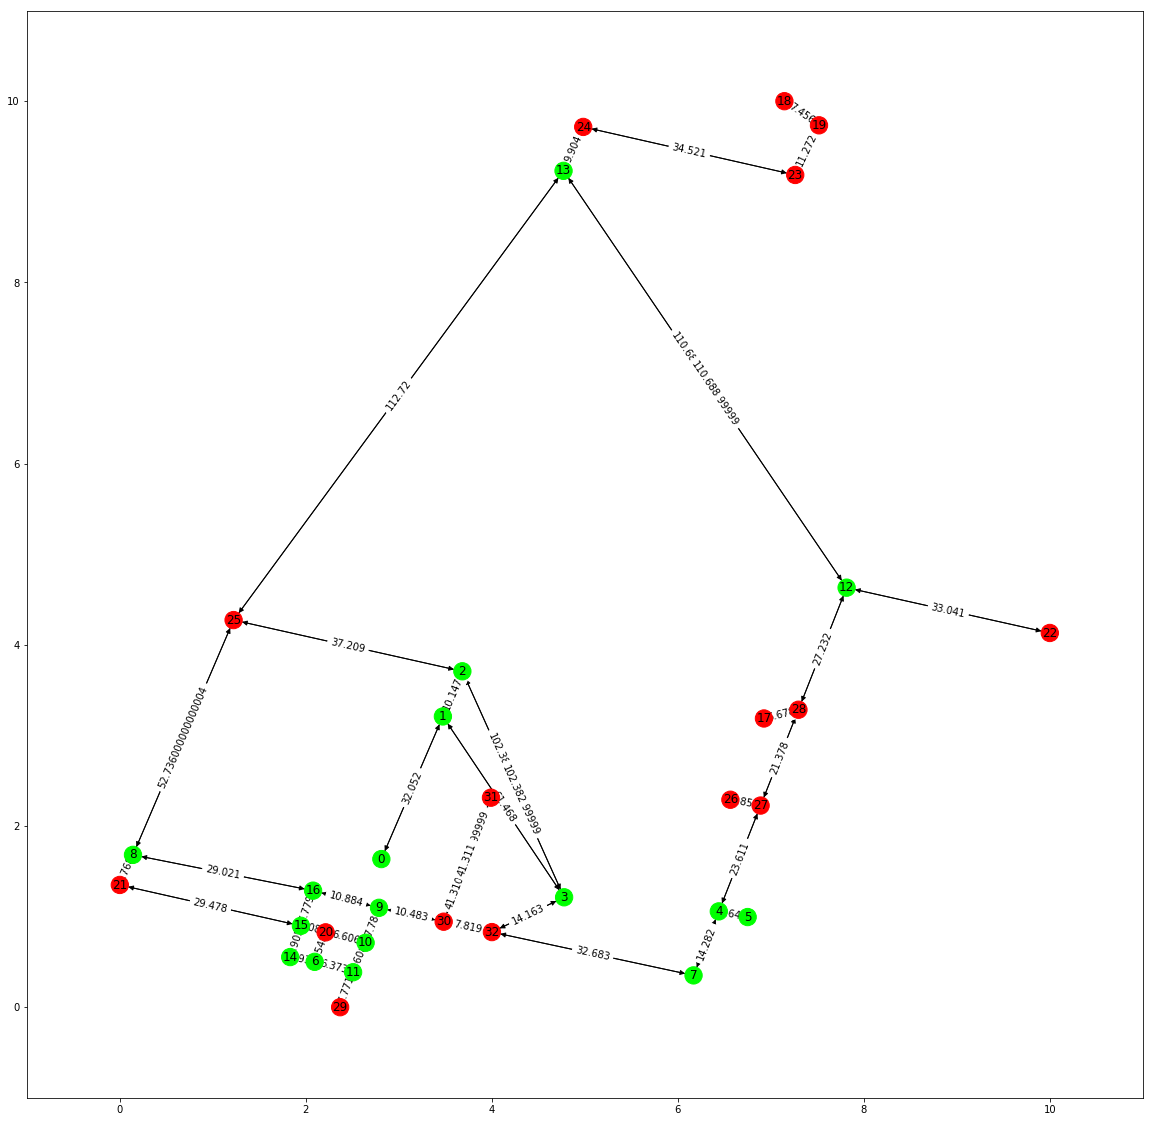

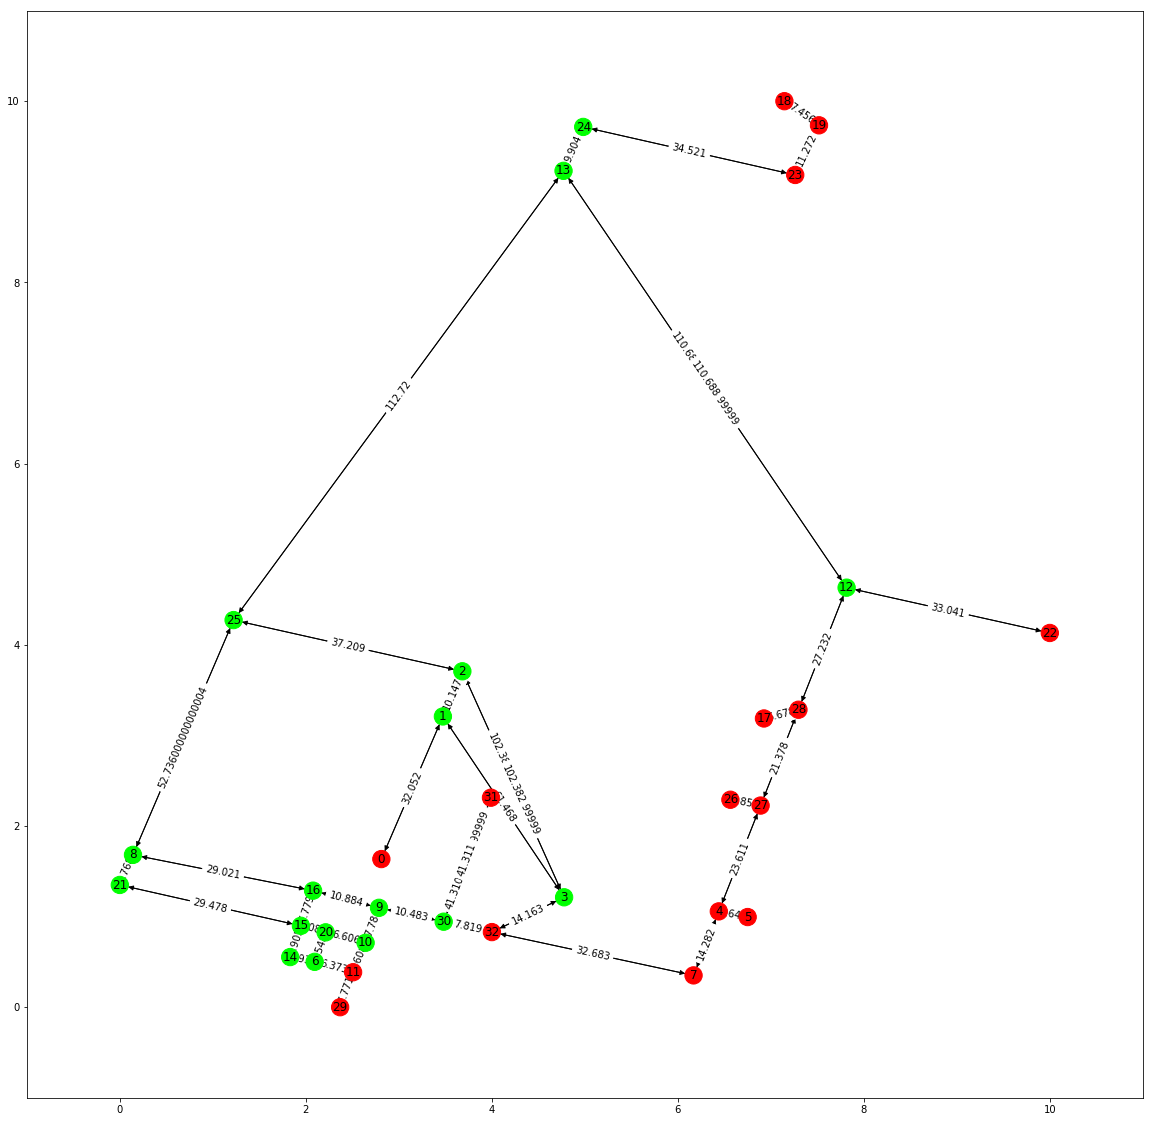

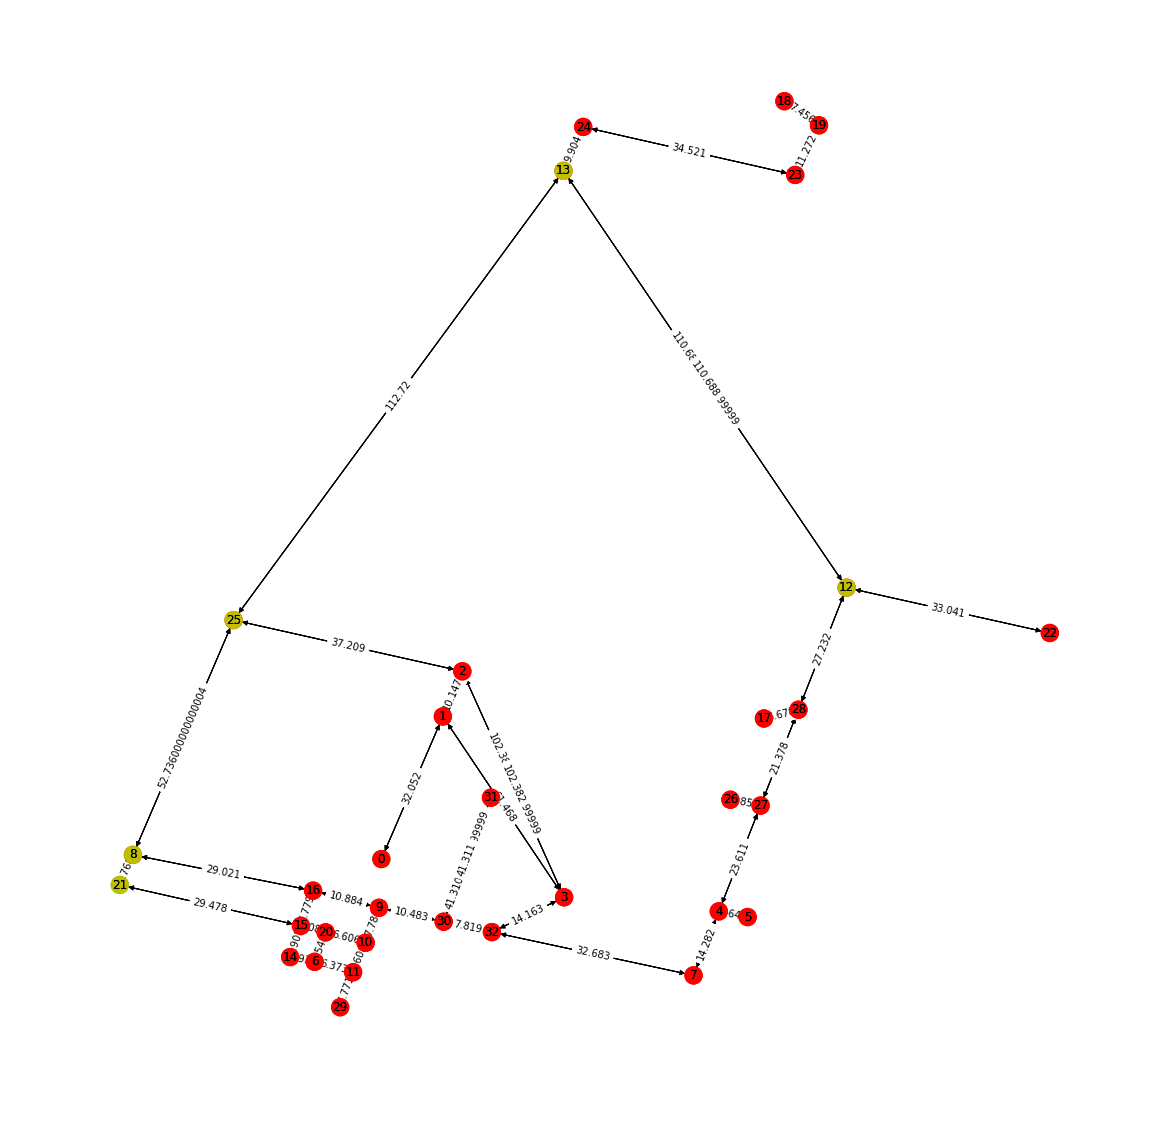

In [217]:
from collections import deque

start_node=21
dest_node = 12

queue = deque()
queue.append(start_node)
visited = set()
paths = dict()
tried = []
while len(queue) > 0:
    node = queue.popleft()
    
    t = [node]
    while t[-1] != start_node:
        t.append(paths[t[-1]])
    tried.append(t)
    
    if node==dest_node:
        print('Made it!')
        break
    
    for child in g[node].keys():
        if child in visited:
            continue
            
        if child not in queue:
            paths[child] = node
            queue.append(child)

            
    visited.add(node)
    
path = [dest_node]
while path[-1]!=start_node:
    path.append(paths[path[-1]])
path
tried.append(path)

node_colors = ['y' if n in path else 'r' for n in g.nodes()]

nx.draw_networkx_nodes(g, pos, node_color=node_colors)
nx.draw_networkx_labels(g, pos)
nx.draw_networkx_edges(g, pos)
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

plt.axis('off')
plt.show()

In [218]:
fig, ax = plt.subplots()
ax.set_xlim((-1,11))
ax.set_ylim((-1,11))

node_colors = ['r' for n in g.nodes()]
draw = nx.draw_networkx_nodes(g, pos, ax=ax, node_color=node_colors)
colors = draw.get_facecolors()
orig_colors = colors.copy()
nx.draw_networkx_labels(g, pos, ax=ax)
nx.draw_networkx_edges(g, pos, ax=ax)
nx.draw_networkx_edge_labels(g, pos, edge_labels=edge_labels)

def animate(i):
    colors = orig_colors.copy()
    for node in tried[i]:
        colors[node] = np.array([0,1,0,1]) 
    draw.set_color(colors)
    return draw
    
anim = animation.FuncAnimation(fig, animate, frames=len(tried), interval=1000)
anim